In [1]:
from common import Common
import _pickle as pickle
import collections
import re
import matplotlib.pyplot as plt
import operator
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def dataset(name):
    with open("{}.dict.c2s".format(name), "rb") as file:
        subtoken_to_count = pickle.load(file)
        node_to_count = pickle.load(file)
        target_to_count = pickle.load(file)
        max_contexts = pickle.load(file)
        num_training_examples = pickle.load(file)
        print("Dictionaries loaded.")
        return target_to_count, subtoken_to_count

In [3]:
target_med, subtoken_med = dataset("java-med/java-med")

Dictionaries loaded.


{'get': 635514,
 'test': 327631,
 'set': 282718,
 'on': 137832,
 'to': 124753,
 'is': 120109,
 'with': 112894,
 'create': 101436,
 'name': 74822,
 'string': 69782,
 'type': 62722,
 'id': 57960,
 'add': 54089,
 'value': 51785,
 'from': 46854,
 'for': 42610,
 'in': 40625,
 'run': 36278,
 'code': 34873,
 'and': 34382,
 'read': 34091,
 'should': 33881,
 'write': 33858,
 'equals': 33191,
 'instance': 33007,
 'file': 32134,
 'key': 31795,
 'class': 31627,
 'update': 30639,
 'hash': 30450,
 'all': 29751,
 'list': 29516,
 'visit': 29099,
 'by': 27626,
 'method': 27322,
 'not': 27199,
 'data': 26899,
 'remove': 26819,
 'new': 26579,
 'of': 26123,
 'start': 25120,
 'size': 24779,
 'field': 24600,
 'do': 24353,
 'parse': 24048,
 'async': 23763,
 'view': 23241,
 'error': 23062,
 'object': 22956,
 'check': 22621,
 'map': 22456,
 'default': 22241,
 'has': 21633,
 'find': 20908,
 'next': 20802,
 'init': 20734,
 'null': 20725,
 'execute': 20449,
 'call': 20029,
 'build': 19954,
 'path': 19918,
 'reque

In [4]:
print("Java-med target vocab size: ", len(target_med))
print("Java-med subtoken vocab size: ", len(subtoken_med))

Java-med target vocab size:  26347
Java-med subtoken vocab size:  186277


In [5]:
target_to_count_bpe, subtoken_to_count_bpe = dataset("data/java-small-bpe-full/java-small-bpe-full")

Dictionaries loaded.


In [6]:
print("Java-small BPE 1k target vocab size: ", len(target_to_count_bpe))
print("Java-small BPE 1k subtoken vocab size: ", len(subtoken_to_count_bpe))

Java-small BPE target vocab size:  1007
Java-small BPE subtoken vocab size:  2269


In [7]:
target_to_count, small_input = dataset("data/java-small/java-small")

Dictionaries loaded.


In [10]:
print("Java-small target vocab size: ", len(target_to_count))
print("Java-small subtoken vocab size: ", len(small_input))
len(target_to_count)-8700

Java-small target vocab size:  11316
Java-small subtoken vocab size:  73904


2616

In [11]:
df = pd.DataFrame(target_to_count.items(), columns=["Word","Frequency"])

In [12]:
df_bpe = pd.DataFrame(target_to_count_bpe.items(), columns=["Word","Frequency"])

In [14]:
df_small_i = pd.DataFrame(small_input.items(), columns=["Word","Frequency"])

In [15]:
df_med = pd.DataFrame(target_med.items(), columns=["Word","Frequency"])

In [16]:
df_med_i = pd.DataFrame(subtoken_med.items(), columns=["Word","Frequency"])

In [17]:
df_med.iloc[::-1]

,Word,Frequency
26346,onoffline,1
26345,cinder,1
26344,jpql,1
26343,lpolestr,1
26342,jspm,1
26341,protcol,1
26340,charmed,1
26339,pprior,1
26338,increcleanup,1
26337,locext,1


In [18]:
df_small_i = pd.DataFrame(small_input.items(), columns=["Word","Frequency"])

In [19]:
len(df_med_i[df_med_i.Frequency<5])

0

In [20]:
len(df_bpe[df_bpe.Frequency<5])

47

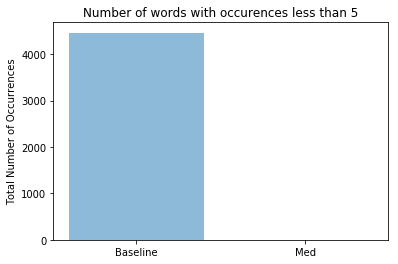

In [26]:
objects = ("Baseline","Med")
vectors = [len(df_small_i[df_small_i.Frequency<5]), len(df_med_i[df_med_i.Frequency<5])]
y_pos = np.arange(len(objects))
f = plt.figure()
plt.bar(y_pos, vectors, align='center', alpha=0.5)
plt.title("Number of words with occurences less than 5")
plt.ylabel("Total Number of Occurrences")
plt.xticks(y_pos, objects)

#plt.show()
f.savefig("occurences.pdf", bbox_inches='tight')

In [29]:
def plotWord(word, target_to_count, title):
    sorted_doc = (sorted(target_to_count.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    word_rank = []
    word_frequency = []
    words = ["get", "return"]
    entry_num = 1
    for entry in sorted_doc:
        if (entry[0] in words):
            word_rank.append(entry_num)
            word_frequency.append(entry[1])

        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])
    f = plt.figure()
    plt.title("Word Frequencies in " + title)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word (\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
    plt.scatter(
        word_rank,
        word_frequency,
        color="orange",
        marker="o",
        s=100,
        label=word
    )
    #plt.show()
    f.savefig("word_" + word + title + ".pdf", bbox_inches='tight')

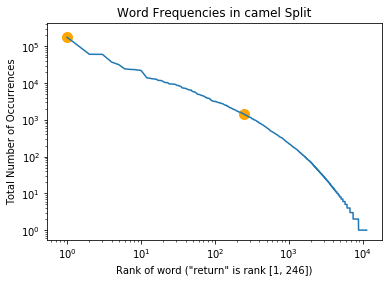

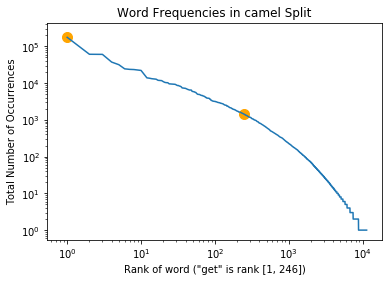

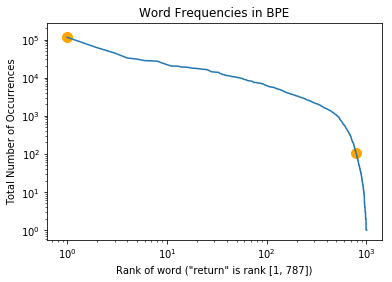

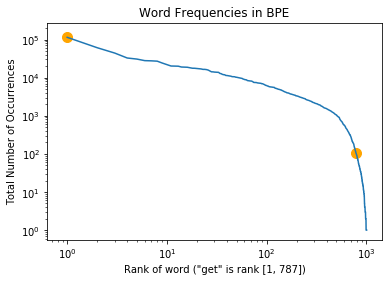

In [30]:
plotWord("return", target_to_count, "camel Split")
plotWord("get", target_to_count, "camel Split")
plotWord("return", target_to_count_bpe, "BPE")
plotWord("get", target_to_count_bpe, "BPE")

In [24]:
print(len(target_to_count))
print(len(target_to_count_bpe))

11316
1007
